# Image & Text Augmentations for Machine Learning

Jes Ford, PhD  
Senior ML Engineer, Cash App (Block)

# Jes Ford here 👋

# 🏂 🔭 🐕 📝 

```python
def my_talk():
    why = background()
    what = basic_overview()
    image_augmentation_demo(**cute_dogs)
    text_augmentation_demo()
    take_away = summarize()
```

# Goal: we want models that generalize

i.e. avoid overfitting, perform well on completely new data

<img src="https://miro.medium.com/max/1000/1*nhmPdWSGh3ziatQKOmVq0Q.png" style="width: 500px;">

[Source](https://medium.com/analytics-vidhya/early-stopping-with-pytorch-to-restrain-your-model-from-overfitting-dce6de4081c5) of generic overfitting illustration.

# Goal: we want models that generalize

i.e. avoid overfitting, perform well on completely new data

Many ways to prevent overfitting (including dropout, large learning rates, small batch sizes, weight decay...)

In this talk we focus on the <ins>root cause</ins> of the problem: access to <ins>limited data</ins>

- dropout randomly zeros out some of the activations forcing the network to learn robust features instead of focusing on specific neurons
- large LRs can excape local minima
- small batch sizes are noisy
- weight decay penalizes large weights (kinda analogous to L2 regularization but more complicated)

# More data is better, but costs 💰...

Models get better the more (good) training data you have

Labeled training data is expensive
- humans hand-labeling cats, hotdogs, airplanes...
- ImageNet has >14M images, labelled via [mechanical turk](https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/)...
- Medical images are costly, certain conditions are rare

# Invariants

Robust models should be invariant to certain changes, for example

$\rightarrow$ *translational invariance* in an image:

<img src="https://i.stack.imgur.com/UKwFg.jpg" style="width: 800px;">

[Image Source](https://towardsdatascience.com/image-augmentation-for-deep-learning-histogram-equalization-a71387f609b2)

# Invariants

Robust models should be invariant to certain changes, for example

$\rightarrow$ choice of *synonyms* in a sentence:

- "Her dog is adorable"
- "Her pup is so cute"

# Solution: Augmentation

Increase the size of your training dataset using the data you already have.

- Image Augmentations
  - [`albumentations`](https://albumentations.ai/)
- Text Augmentations
  - [`nlpaug`](https://nlpaug.readthedocs.io/en/latest/)

# Image Transformations

- geometric
- colorspace
- kernel filters
- random erasing
- mixing images

In [2]:
import albumentations as A

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show_img(img, figsize=(8, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

# Image Transformations

- geometric $\leftarrow$
- colorspace
- kernel filters
- random erasing
- mixing images

# Geometric transformations

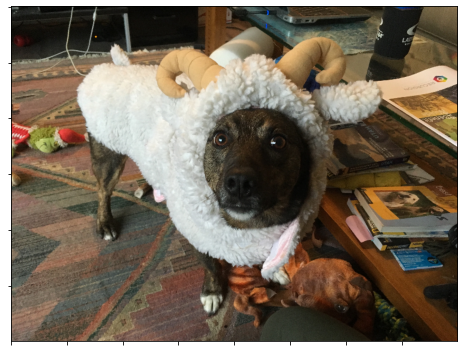

In [5]:
image = cv2.imread('images/toki_as_sheep.jpg')  # cute dog #1
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800, 600))
show_img(image)

# Geometric transformations

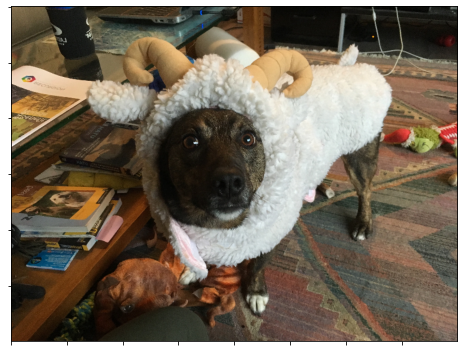

In [6]:
transform = A.HorizontalFlip(p=1)

new_image = transform(image=image)['image']
show_img(new_image)

# Geometric transformations

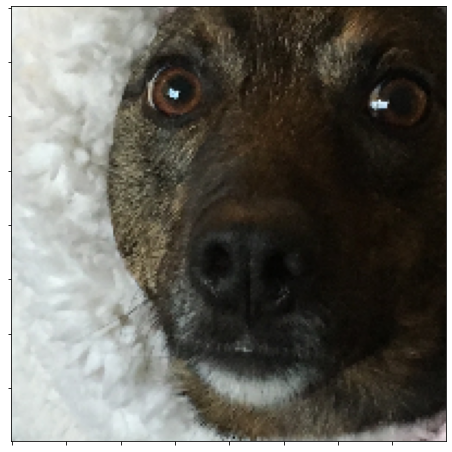

In [7]:
transform = A.CenterCrop(200, 200, p=1)

new_image = transform(image=image)['image']
show_img(new_image)

# Geometric transformations

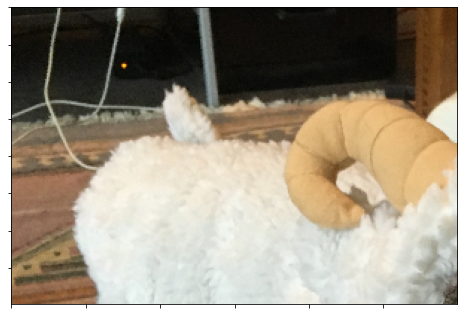

In [8]:
transform = A.RandomCrop(200, 300, p=1)

new_image = transform(image=image)['image']
show_img(new_image)

# Geometric transformations

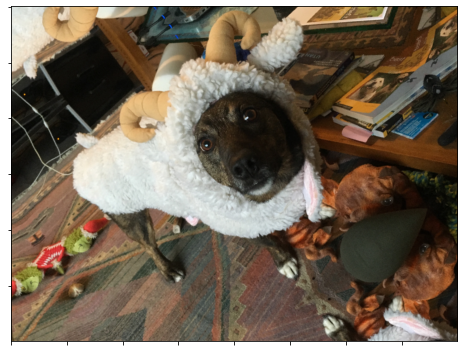

In [9]:
transform = A.ShiftScaleRotate(p=1)

new_image = transform(image=image)['image']
show_img(new_image)

# Geometric transformations

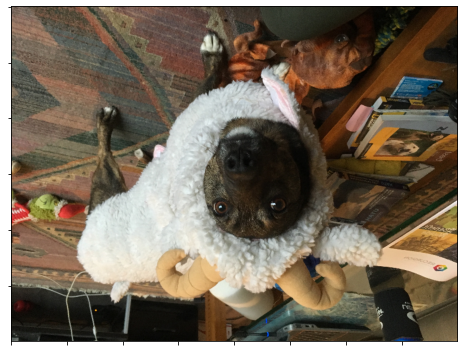

In [10]:
transform = A.VerticalFlip(p=1)  # does this make sense for use case?

new_image = transform(image=image)['image']
show_img(new_image)

# Geometric transformations

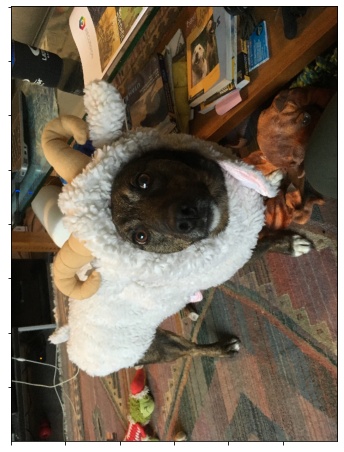

In [11]:
transform = A.RandomRotate90(p=1)

new_image = transform(image=image)['image']
show_img(new_image)

# Geometric Transformations Summary

- flips: horizontal most common
- crops: random or center are common, can be practical approach to heterogenous input
- rotations: small angles common
- shifts/translations

##  What transforms make sense for my data?

Will they help my model generalize? Do they preserve the label?

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" style="width: 450px;">

What kinds of geometrics transformations make sense for MNIST?

# Image Transformations

- geometric
- colorspace $\leftarrow$
- kernel filters
- random erasing
- mixing images

# Colorspace Transformations

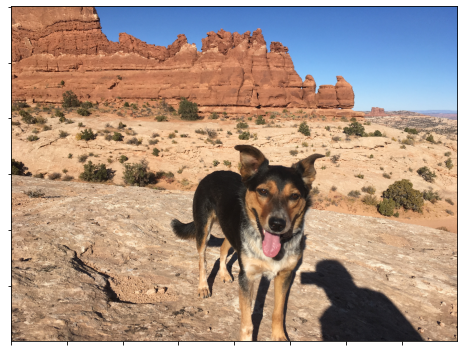

In [12]:
image = cv2.imread('images/kazu_in_moab.jpg')  # cute dog #2
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800, 600))
show_img(image)

# Colorspace Transformations

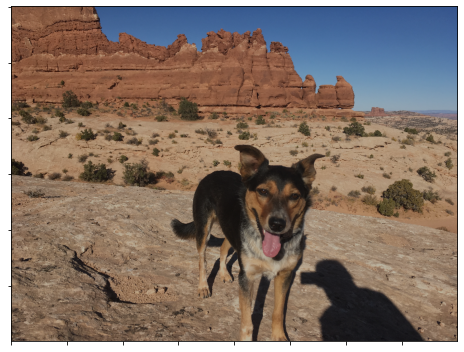

In [13]:
transform = A.RandomBrightnessContrast(p=1, contrast_limit=0.3)

new_image = transform(image=image)['image']
show_img(new_image)

- Brightness: overall lightness/darkness of image (pixel values)
- Contrast: difference between lightest and darkest parts of image

- Hue: color, think colorwheel with random angle changes
- Saturation: brilliance of the color
- Value: the lightness/darkness of the color (think mixing with white, black paint)

# Colorspace Transformations

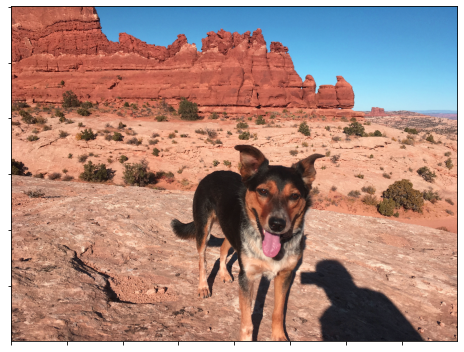

In [14]:
transform = A.HueSaturationValue(p=1)

new_image = transform(image=image)['image']
show_img(new_image)

# Colorspace Transformations

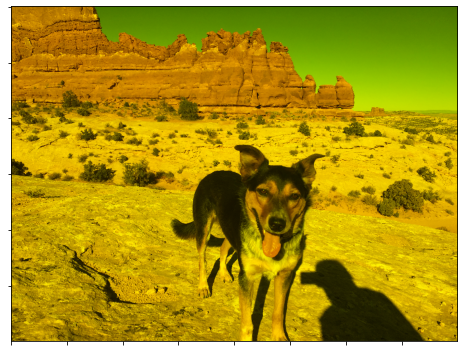

In [15]:
transform = A.ChannelDropout(p=1)  # zero out one of the 3 channels

new_image = transform(image=image)['image']
show_img(new_image)

# Colorspace Transformations

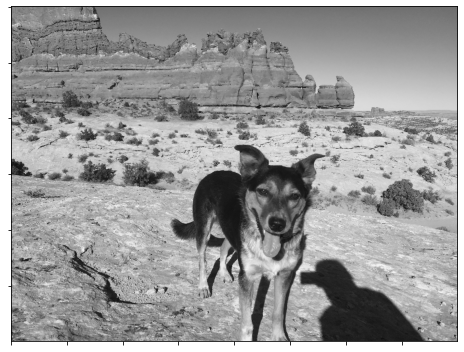

In [16]:
transform = A.ToGray(p=1)

new_image = transform(image=image)['image']
show_img(new_image)

# Image Transformations

- geometric
- colorspace
- kernel filters $\leftarrow$ blur or sharpen images
- random erasing
- mixing images

# Image Transformations

- geometric
- colorspace
- kernel filters
- random erasing $\leftarrow$
- mixing images

# Random Erasing

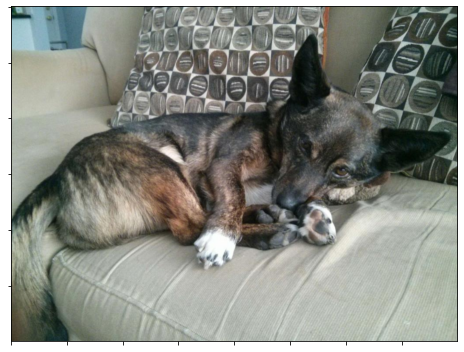

In [17]:
image = cv2.imread('images/couch_dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800, 600))
show_img(image)

# Random Erasing

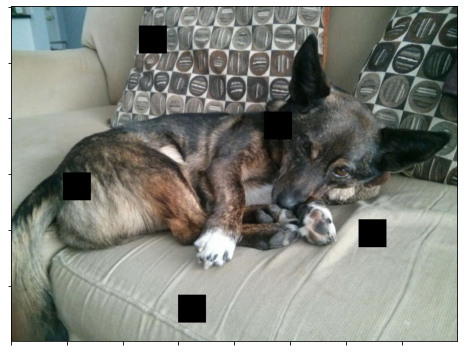

In [18]:
transform = A.CoarseDropout(max_holes=5, max_height=50, max_width=50, p=1)

new_image = transform(image=image)['image']
show_img(new_image)

# Random Erasing

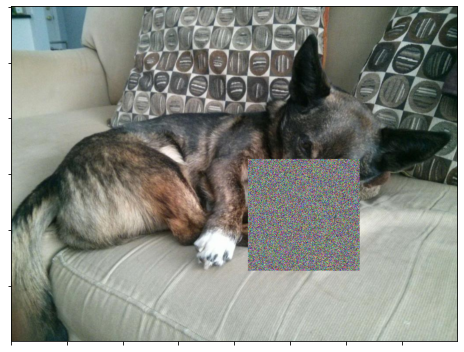

In [19]:
random_fill_values = np.random.randn(200, 200, 3) * image.std() + image.mean()

transform = A.CoarseDropout(
    max_holes=1, max_height=200, max_width=200, p=1, fill_value=random_fill_values
)

new_image = transform(image=image)['image']
show_img(new_image)

# Random Erasing (aka Cutout) Summary

- Forces model to pay attention to the whole image, not a subset
- Helps overcome issues with occlusion or unclear parts of test images
- Inspired by Dropout\* but acts on the input data

$\rightarrow$ Careful: *this augmentation might not preserve the label!*

\* Dropout: regularization technique that zeros out a random fraction of weights in a neural network layer.

# Image Transformations

- geometric
- colorspace
- kernel filters
- random erasing
- mixing images $\leftarrow$

# Mixing Images

- Unlike previous augmentations, these operate on multiple images
- Beyond scope of `albumentations` library...
- 2 examples:
  - Mixup: averages pixels
  - CutMix: combines crops

$\rightarrow$ _what will the label be when we combine images from different classes?_

In [20]:
dog = cv2.imread('images/corgi.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
dog = cv2.resize(dog, (500, 650))

cat = cv2.imread('images/fluffycat.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
cat = cv2.resize(cat, (500, 650))

# Mixing Images

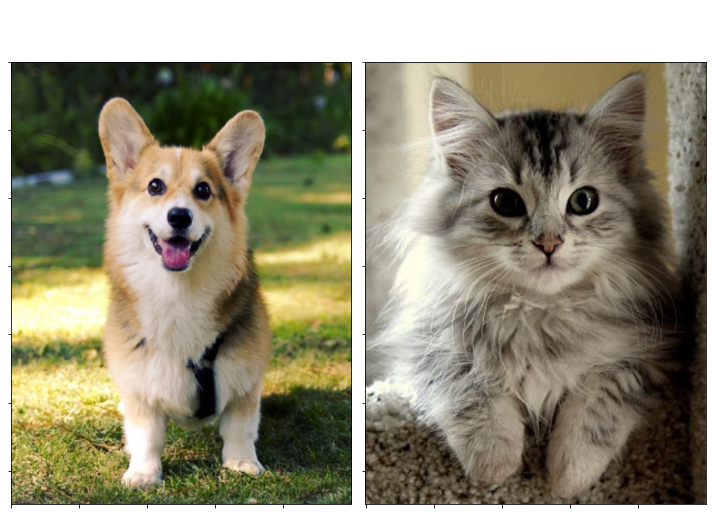

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
for ax, img in zip(axes, [dog, cat]):
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img)
plt.tight_layout()
plt.suptitle("Binary Labels {1: 'Dog', 0: 'Cat'}", size=30, color='w');

# Mixing Images

In [22]:
# modified from https://github.com/moskomule/mixup.pytorch/blob/master/main.py
def mixup(images, labels, fraction=None):
    image1, image2 = images
    label1, label2 = labels

    if fraction is None:
        fraction = np.random.rand()
    mixed_image = image1 * fraction + (1 - fraction) * image2
    mixed_label = label1 * fraction + (1 - fraction) * label2
    return mixed_image.astype(int), mixed_label


# modified from https://github.com/hysts/pytorch_cutmix/blob/master/cutmix.py
def cutmix(images, labels, alpha=2):
    image1, image2 = images

    image_h, image_w = image1.shape[:2]
    cx = np.random.uniform(0, image_w)
    cy = np.random.uniform(0, image_h)
    lam = np.random.beta(alpha, alpha)
    w = image_w * np.sqrt(1 - lam)
    h = image_h * np.sqrt(1 - lam)
    x0 = int(np.round(max(cx - w / 2, 0)))
    x1 = int(np.round(min(cx + w / 2, image_w)))
    y0 = int(np.round(max(cy - h / 2, 0)))
    y1 = int(np.round(min(cy + h / 2, image_h)))

    mixed_image = image1.copy()
    mixed_image[y0:y1, x0:x1, :] = image2[y0:y1, x0:x1, :]

    fraction = (y1 - y0) * (x1 - x0) / (image_h * image_w)
    mixed_label = fraction * labels[1] + (1 - fraction) * labels[0]

    return mixed_image, mixed_label

Disclaimer: above functions are just toy examples for the simplest illustration of the concepts - they take exactly two images and assume binary classification with label 1 or 0. See the links given for each for more useful code for training that operates on a variable size batch with one-hot labels.

# Mixing Images

Mixup examples:

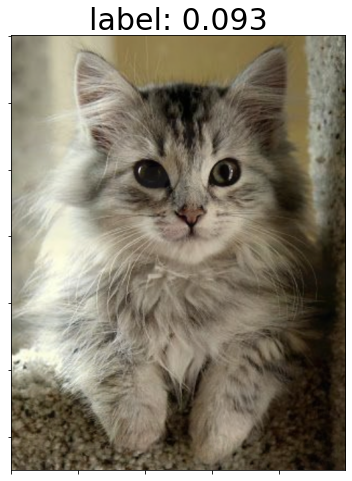

In [23]:
mix_img, mix_label = mixup([dog, cat], [1, 0])
show_img(mix_img)
plt.title('label: {:.3f}'.format(mix_label), size=30);

# Mixing Images
CutMix examples:

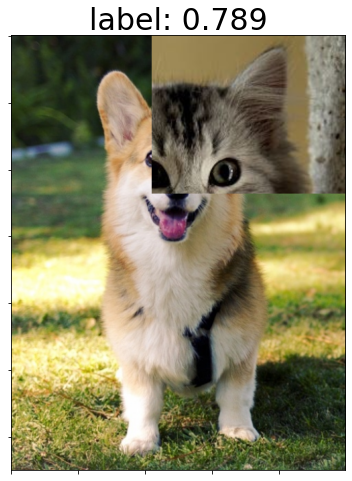

In [24]:
mix_img, mix_label = cutmix([dog, cat], [1, 0])
show_img(mix_img)
plt.title('label: {:.3f}'.format(mix_label), size=30);

# Mixing Images Summary

- Mixup (pixel averaging) and CutMix (overlaying crops) are two ways of mixing images
- Possible final label represents fraction of each image in the composite
- Not obvious to humans that this would be useful... but it is!

<img src="https://forums.fast.ai/uploads/default/original/3X/4/b/4b00023c65aa58fbe58b02271de08949e53c64b9.png" style="width: 500px;">

[arXiv:1905.04899](https://arxiv.org/abs/1905.04899)

Pascal VOC Det = transfer learning with fine tuning task

Why does mixing work?
- Cutout helps make models robust to occlusion, but it loses information
- Mixup retains all information but does not solve occlusion
- CutMix gets the best of both
- Maybe also like label smoothing

# Combining Image Augmentations

In [25]:
transform = A.Compose([

    # geometric
    A.RandomCrop(400, 400, p=1),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    
    # colorspace
    A.RandomBrightnessContrast(p=0.5),
    A.HueSaturationValue(p=0.5),

    # kernel
    A.GaussianBlur(p=0.5),
    
    # random erasing
    A.CoarseDropout(max_holes=1, max_height=100, max_width=100, p=0.5),
    
])

# Combining Image Augmentations

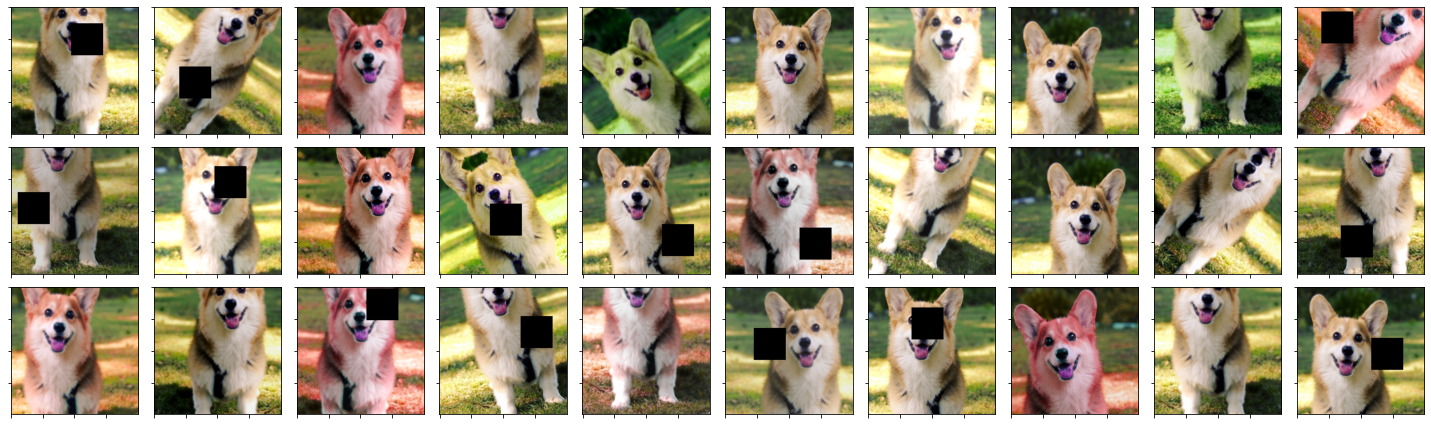

In [26]:
fig, axes = plt.subplots(3, 10, figsize=(20, 6))

for ax in axes.ravel():
    new_image = transform(image=dog)['image']
    ax.imshow(new_image)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.tight_layout()

# Text Augmentations

# Text Augmentations

- char
- word
- sentence

In [27]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw

# Text Augmentations

- char $\leftarrow$
- word
- sentence

# Character-level Augmentations

In [28]:
text = 'Those two dogs are very cute, and also well behaved!'

In [29]:
aug = nac.RandomCharAug()
aug.augment(text, n=5)

['Those two dUgs are very cute, and Zlso weZl behaved!',
 'Those two dpgs are ve_y cute, and also well JeNaved!',
 'Those two dogs are vsry cute, and als6 well bePSved!',
 'Th1se two dogs are Lery cute, and also Well behaved!',
 'Those two dogs are very cute, and olso Uell b6have9!']

# Character-level Augmentations

In [30]:
aug = nac.RandomCharAug(action='swap')  # insert, substitute, swap, delete
aug.augment(text, n=5)

['Those two dogs are very cute, and alos well ehbaved!',
 'Those two dogs are evry ucte, and also well behaved!',
 'Those two dosg are very cute, and also wlel ebhavde!',
 'Those two dogs are veyr cute, and also wlel beahevd!',
 'Those two odgs are very cute, and aslo well behaved!']

# Character-level Augmentations

### Mimic typing errors by swapping adjacent keys

In [31]:
aug = nac.KeyboardAug(aug_char_max=1, aug_word_max=1)
aug.augment(text, n=5)

['Those two dogs are very cute, and also weOl behaved!',
 'Those two dobs are very cute, and also well behaved!',
 'ThoAe two dogs are very cute, and also well behaved!',
 'Those two dogs are very cute, and also we;l behaved!',
 'Those two dogs are very cite, and also well behaved!']

# Text Augmentations

- char
- word $\leftarrow$
- sentence

# Word-level Augmentations

### Common mispellings

... although spell check & autocorrect are so common - do we need this?

In [32]:
aug = naw.SpellingAug()
aug.augment(text, n=5)

['These two dogs are very cute, and algo well behaviored!',
 'Those two dogs are very cute, dnd aso well behaviored!',
 'These two gogs are very cute, and also well behaviored!',
 'Those two dogs aru very cute, anda also wll behaved!',
 'Thoes two dogs are very cute, and aolso vell behaved!']

# Word-level Augmentations

### Thesaurus-based synonym replacement

In [33]:
# import nltk
# nltk.download('omw-1.4')
# nltk.download('wordnet')

In [34]:
text = 'Those two dogs are very cute, and also well behaved!'

In [35]:
aug = naw.SynonymAug()  # default wordnet, PPDB is also good
aug.augment(text, n=5)

['Those two dogs follow rattling cute, and besides well behaved!',
 'Those two dogs be very cute, and besides well behave!',
 'Those 2 dogs are very cute, and also substantially comport!',
 'Those deuce canis familiaris are very cunning, and also well behaved!',
 'Those two cad are really cute, and also well bear!']

# Word-level Augmentations

### Synonym replacement using word embeddings (word2vec)

Note: can be helpful to constrain the augmentation via `top_k`, `aug_max`, etc.

In [36]:
# download the word2vec model and unzip in the local models/ dir
# https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [37]:
text = 'Those two dogs are very cute, and also well behaved!'

In [38]:
# Note: below runs very slowly (few min) on my old mac :(

In [39]:
aug = naw.WordEmbsAug(model_type='word2vec', model_path='models/GoogleNews-vectors-negative300.bin')
aug.augment(text, n=5)

['Those two dogs theyare very adorable, and also perfectly behaved!',
 "Those two dogs that're very cute, and separately well misbehaving!",
 'Those two dogs must very Awww, and also respectably behaved!',
 'Newer two dogs are very cute, and obviously Handsome_cultured behaved!',
 'Those two dogs themselves awfully cute, and also well functioned!']

# Word-level Augmentations

### Synonym replacement using contextual word embeddings (BERT)

Note: can be helpful to constrain the augmentation via `top_k`, `aug_max`, etc.

In [40]:
text = 'Those two dogs are very cute, and also well behaved!'

In [41]:
aug = naw.ContextualWordEmbsAug()  # bert-base-uncased
aug.augment(text, n=5)

['those two dogs appear very cute, and well well behaved!',
 'those two dogs turned very cute, and far equally behaved!',
 'small gray dogs are very cute, and also particularly behaved!',
 'those paper dogs are rather cute, and totally well behaved!',
 'our two dogs are very robust, and also well placed!']

Remember to think about the reason for an augmentation:
- What do you want your model to be robust to?
- Are these transformations useful for your goal?
- Is label integrity maintained?

# Text Augmentations

- char
- word
- sentence $\leftarrow$

# Back Translation

Translate to another language and then back.

In [42]:
text = 'Those two dogs are very cute, and also well behaved!'

In [43]:
# English -> German -> English
aug = naw.BackTranslationAug()
aug.augment(text)

'These two dogs are very sweet and well behaved!'

In [44]:
# English -> Spanish -> English
aug = naw.BackTranslationAug(
    from_model_name='Helsinki-NLP/opus-mt-en-es',
    to_model_name='Helsinki-NLP/opus-mt-es-en',
)
aug.augment(text)

'Those two dogs are very cute, and they also behave well!'

# Combining Text Augmentations

In [45]:
import nlpaug.flow as naf

In [46]:
augmentations = [
    naw.SynonymAug(aug_max=1),
    naw.BackTranslationAug(),
    nac.KeyboardAug(aug_word_max=1, aug_char_max=1),
]

In [47]:
aug = naf.Sometimes(augmentations, pipeline_p=0.5)
aug.augment(text, n=5)

['Those 2 dogs are vsry cute, and also well behaved!',
 'These two dogs are very sweet and well behaved!',
 'These two doTs are very sweet and well behaved!',
 'Those two dogs are very cute, and also wel> behaved!',
 'These two dogs are very cute and also easy to behave!']

# Text Augmentation Results

- Facebook AI Research won a Machine Translation contest ([WMT19](https://aclanthology.org/W19-5333.pdf)) partially by leveraging backtranslation.
- A more recent paper used Twitter data and backtranslation with >100 languages; showed good alignment between original and transformed text, across a variety of metrics:

<img src="images/backtranslate.png" style="width: 500px;">

[arXiv:2102.09708](https://arxiv.org/abs/2102.09708)

# Summary

Problem = limited training data

Solution = create more training data
- `albumentations` is a fast (production-ready) image augmentation library
- `nlpaug` for experimenting with text augmentation

# Summary

Remember...
- not all transformations are useful
- be careful to preserve your labels
- think about the types of transformations you want the model to be robust to... what might your model see in the wild that is not in the training data?

# Thank you!

- This presentation is a Jupyter Notebook on GitHub: [insert github link](http://www.github.com)


### Interested in working with me?

👩‍💻 CashApp is hiring for Data Scientists, Machine Learning Engineers/Modelers, and lots more.

👀 https://cash.app/careers

😊 I'm happy to talk to you about CashApp or jobs generally - please reach out!

- Reveal Themes: https://github.com/hakimel/reveal.js/tree/master/css/theme/source
- How to save pdf:
> replace the # after the the_notebook.slides.html in the browser URL with ?print-pdf so that the url looks most likely like http://127.0.0.1:8000/the_notebook.slides.html?print-pdf
  - https://revealjs.com/pdf-export/
- Create static (not executable) slides: `jupyter nbconvert augmentation-demo.ipynb --to slides --post serve --SlidesExporter.reveal_transition=none --HTMLExporter.theme=dark --SlidesExporter.reveal_theme=night --SlidesExporter.reveal_scroll=True`
- OR create interactive slides via a button click using the RISE extension (currently only accessible in Jupyter Notebook, not Jupyterlab)

In [1]:
%%html
<style type="text/css">

.reveal p {
    font-size: 80%;
}

.reveal li {
    font-size: 80%;
}

# .reveal li li {
#     font-size: 80%;
# }

.reveal h1 {
    color: #4ec5c7;
    font-size: 48px;
}

.reveal h2 {
    color: #4ec5c7;
    font-size: 36px;
}

.reveal h3 {
    font-size: 30px;
}

# .reveal table {
#     font-size: 1em;
# }

# .reveal div.highlight {
#     margin: 0; 
# }

# .reveal div.highlight>pre {
#     margin: 0; 
#     width: 100%;
#     font-size: var(--jp-code-font-size);
# }

# .reveal div.jp-OutputArea-output>pre {
#     margin: 0; 
#     width: 90%;
#     font-size: var(--jp-code-font-size);
#     box-shadow: none;
# }

</style>

# note: can't set as slide type "skip" or settings aren't applied, use "notes".